# ExtraaLearn Project

## Context

The EdTech industry has been surging in the past decade immensely, and according to a forecast, the Online Education market would be worth $286.62bn by 2023 with a compound annual growth rate (CAGR) of 10.26% from 2018 to 2023. The modern era of online education has enforced a lot in its growth and expansion beyond any limit. Due to having many dominant features like ease of information sharing, personalized learning experience, transparency of assessment, etc, it is now preferable to traditional education.

In the present scenario due to the Covid-19, the online education sector has witnessed rapid growth and is attracting a lot of new customers. Due to this rapid growth, many new companies have emerged in this industry. With the availability and ease of use of digital marketing resources, companies can reach out to a wider audience with their offerings. The customers who show interest in these offerings are termed as leads. There are various sources of obtaining leads for Edtech companies, like

* The customer interacts with the marketing front on social media or other online platforms.
* The customer browses the website/app and downloads the brochure
* The customer connects through emails for more information.

The company then nurtures these leads and tries to convert them to paid customers. For this, the representative from the organization connects with the lead on call or through email to share further details.

## Objective

ExtraaLearn is an initial stage startup that offers programs on cutting-edge technologies to students and professionals to help them upskill/reskill. With a large number of leads being generated on a regular basis, one of the issues faced by ExtraaLearn is to identify which of the leads are more likely to convert so that they can allocate resources accordingly. You, as a data scientist at ExtraaLearn, have been provided the leads data to:
* Analyze and build an ML model to help identify which leads are more likely to convert to paid customers,
* Find the factors driving the lead conversion process
* Create a profile of the leads which are likely to convert


## Data Description

The data contains the different attributes of leads and their interaction details with ExtraaLearn. The detailed data dictionary is given below.


**Data Dictionary**
* ID: ID of the lead
* age: Age of the lead
* current_occupation: Current occupation of the lead. Values include 'Professional','Unemployed',and 'Student'
* first_interaction: How did the lead first interacted with ExtraaLearn. Values include 'Website', 'Mobile App'
* profile_completed: What percentage of profile has been filled by the lead on the website/mobile app. Values include Low - (0-50%), Medium - (50-75%), High (75-100%)
* website_visits: How many times has a lead visited the website
* time_spent_on_website: Total time spent on the website
* page_views_per_visit: Average number of pages on the website viewed during the visits.
* last_activity: Last interaction between the lead and ExtraaLearn.
    * Email Activity: Seeking for details about program through email, Representative shared information with lead like brochure of program , etc
    * Phone Activity: Had a Phone Conversation with representative, Had conversation over SMS with representative, etc
    * Website Activity: Interacted on live chat with representative, Updated profile on website, etc

* print_media_type1: Flag indicating whether the lead had seen the ad of ExtraaLearn in the Newspaper.
* print_media_type2: Flag indicating whether the lead had seen the ad of ExtraaLearn in the Magazine.
* digital_media: Flag indicating whether the lead had seen the ad of ExtraaLearn on the digital platforms.
* educational_channels: Flag indicating whether the lead had heard about ExtraaLearn in the education channels like online forums, discussion threads, educational websites, etc.
* referral: Flag indicating whether the lead had heard about ExtraaLearn through reference.
* status: Flag indicating whether the lead was converted to a paid customer or not.

## Importing necessary libraries and data

In [1]:
from google.colab import drive
drive.mount('/content/drive')

# Import libraries for data manipulation
import numpy as np
import pandas as pd

# Import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# To scale the data using z-score
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split

# Algorithms to use
from sklearn.linear_model import LogisticRegression

from sklearn.svm import SVC

from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import BaggingClassifier

from sklearn.ensemble import RandomForestClassifier

# Metrics to evaluate the model
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report, precision_recall_curve,recall_score
from sklearn import tree


# For tuning the model
from sklearn.model_selection import GridSearchCV

# To ignore warnings
import warnings
warnings.filterwarnings("ignore")

df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ExtraaLearn.csv')

df.head()

Mounted at /content/drive


,ID,age,current_occupation,first_interaction,profile_completed,website_visits,time_spent_on_website,page_views_per_visit,last_activity,print_media_type1,print_media_type2,digital_media,educational_channels,referral,status
0,EXT001,57,Unemployed,Website,High,7,1639,1.861,Website Activity,Yes,No,Yes,No,No,1
1,EXT002,56,Professional,Mobile App,Medium,2,83,0.320,Website Activity,No,No,No,Yes,No,0
2,EXT003,52,Professional,Website,Medium,3,330,0.074,Website Activity,No,No,Yes,No,No,0
3,EXT004,53,Unemployed,Website,High,4,464,2.057,Website Activity,No,No,No,No,No,1
4,EXT005,23,Student,Website,High,4,600,16.914,Email Activity,No,No,No,No,No,0


In [3]:
df.tail()

,ID,age,current_occupation,first_interaction,profile_completed,website_visits,time_spent_on_website,page_views_per_visit,last_activity,print_media_type1,print_media_type2,digital_media,educational_channels,referral,status
4607,EXT4608,35,Unemployed,Mobile App,Medium,15,360,2.170,Phone Activity,No,No,No,Yes,No,0
4608,EXT4609,55,Professional,Mobile App,Medium,8,2327,5.393,Email Activity,No,No,No,No,No,0
4609,EXT4610,58,Professional,Website,High,2,212,2.692,Email Activity,No,No,No,No,No,1
4610,EXT4611,57,Professional,Mobile App,Medium,1,154,3.879,Website Activity,Yes,No,No,No,No,0
4611,EXT4612,55,Professional,Website,Medium,4,2290,2.075,Phone Activity,No,No,No,No,No,0


In [12]:
df.drop(["ID"], axis = 1, inplace = True)

## Data Overview

- Observations
- Sanity checks

In [13]:
# Let us see the info of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4612 entries, 0 to 4611
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   age                    4612 non-null   int64  
 1   current_occupation     4612 non-null   object 
 2   first_interaction      4612 non-null   object 
 3   profile_completed      4612 non-null   object 
 4   website_visits         4612 non-null   int64  
 5   time_spent_on_website  4612 non-null   int64  
 6   page_views_per_visit   4612 non-null   float64
 7   last_activity          4612 non-null   object 
 8   print_media_type1      4612 non-null   object 
 9   print_media_type2      4612 non-null   object 
 10  digital_media          4612 non-null   object 
 11  educational_channels   4612 non-null   object 
 12  referral               4612 non-null   object 
 13  status                 4612 non-null   int64  
dtypes: float64(1), int64(4), object(9)
memory usage: 504.6+ 

In [14]:
# Understand the shape of the data
df.shape

(4612, 14)

**Observations:**

- Following data set has 4612 rows and 15 columns
- All the columns have 4612 non-null values, i.e., **there are no missing values in the data.**

In [15]:
# Checking unique values in each column
df.nunique()

age                        46
current_occupation          3
first_interaction           2
profile_completed           3
website_visits             27
time_spent_on_website    1623
page_views_per_visit     2414
last_activity               3
print_media_type1           2
print_media_type2           2
digital_media               2
educational_channels        2
referral                    2
status                      2
dtype: int64

**Observations:**
    
Data contains unique rows. There is no need to remove any rows.

In [16]:
# Checking for duplicate values in the data
df.duplicated().sum()

14

## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions**
1. Leads will have different expectations from the outcome of the course and the current occupation may play a key role in getting them to participate in the program. Find out how current occupation affects lead status.
- it is evident that professional people are shows more affliction and want to unroll for this course than students and unemployed
2. The company's first impression on the customer must have an impact. Do the first channels of interaction have an impact on the lead status?
- after exploring the data lead first interactions does not show any major impact on population
3. The company uses multiple modes to interact with prospects. Which way of interaction works best?
- Interaction on email has received most amount of hits and its the most used method by people.
4. The company gets leads from various channels such as print media, digital media, referrals, etc. Which of these channels have the highest lead conversion rate?
- Digital media channel has shown highest lead conversion rate out of all of them.
5. People browsing the website or mobile application are generally required to create a profile by sharing their personal data before they can access additional information.Does having more details about a prospect increase the chances of conversion?
- yes as we can see people who have completed there profile are more interested in these programs and keen to know more about product which improves the chances of a potential lead.

In [25]:
# Making a list of all categorical variables
cat_col = list(df.select_dtypes("object").columns)

# Printing count of each unique value in each categorical column
for column in cat_col:
    print(df[column].value_counts(normalize = True))
    print("-" * 50)

Professional    0.567216
Unemployed      0.312446
Student         0.120338
Name: current_occupation, dtype: float64
--------------------------------------------------
Website       0.551171
Mobile App    0.448829
Name: first_interaction, dtype: float64
--------------------------------------------------
High      0.490893
Medium    0.485906
Low       0.023200
Name: profile_completed, dtype: float64
--------------------------------------------------
Email Activity      0.493929
Phone Activity      0.267563
Website Activity    0.238508
Name: last_activity, dtype: float64
--------------------------------------------------
No     0.892238
Yes    0.107762
Name: print_media_type1, dtype: float64
--------------------------------------------------
No     0.94948
Yes    0.05052
Name: print_media_type2, dtype: float64
--------------------------------------------------
No     0.885733
Yes    0.114267
Name: digital_media, dtype: float64
--------------------------------------------------
No     0.84

**Observations**
- Majority customer are professional followed by unemployed.
- Most of the people have completed there profiles.
- People are more responsive on interacting with emails



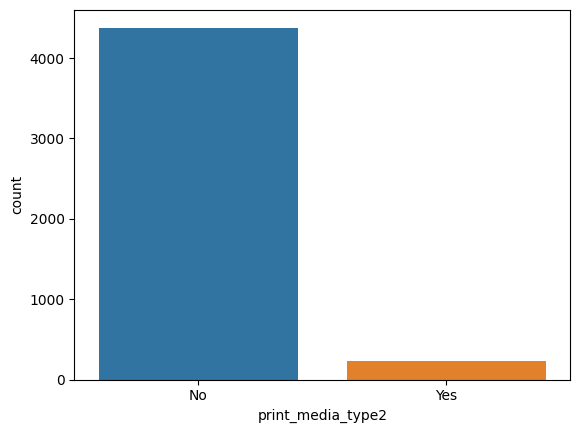

In [26]:
#df[''].value_counts(normalize=True)
sns.countplot(x = df['print_media_type2'])
plt.show()

In [27]:
# Defining the stacked_barplot() function
def stacked_barplot(data,predictor,target,figsize=(10,6)):
  (pd.crosstab(data[predictor],data[target],normalize='index')*100).plot(kind='bar',figsize=figsize,stacked=True)
  plt.legend(loc="lower right")
  plt.ylabel(target)

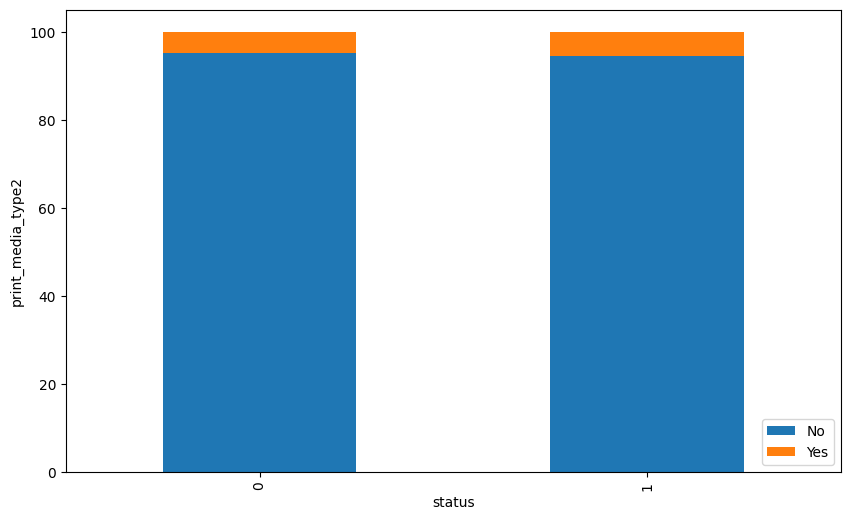

In [28]:
stacked_barplot(df, "status", "print_media_type2" )

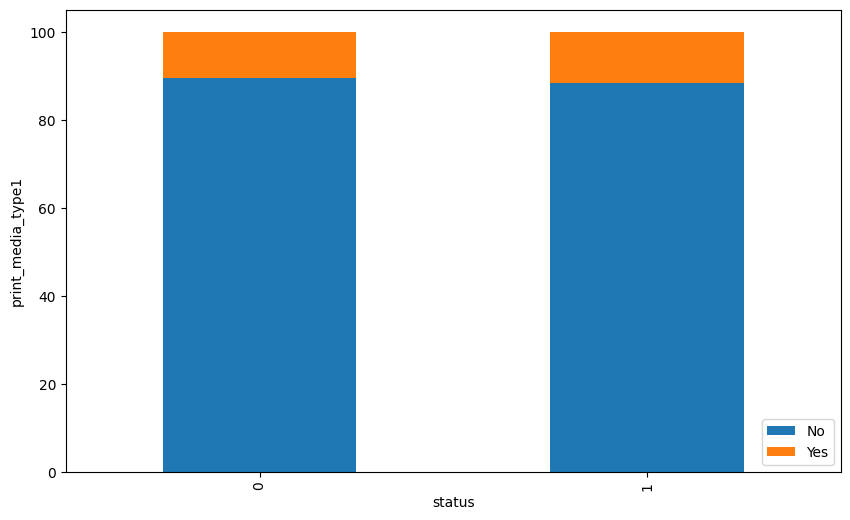

In [29]:
stacked_barplot(df, "status", "print_media_type1" )

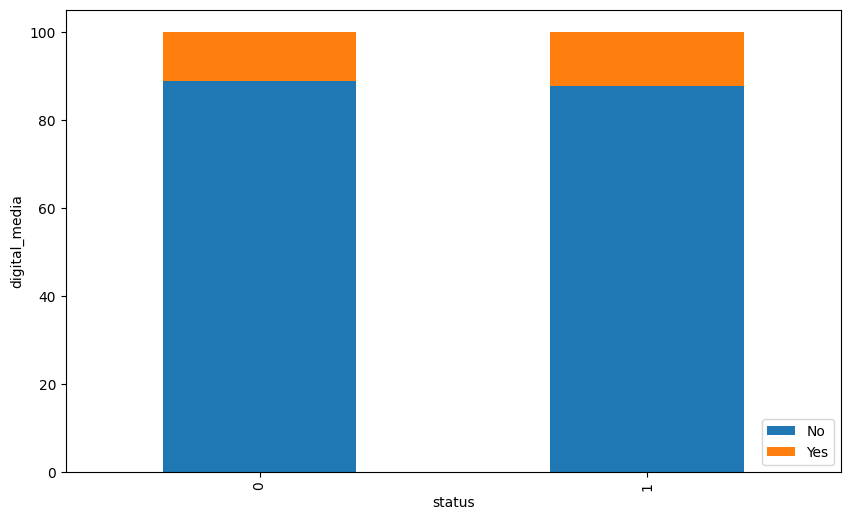

In [11]:
stacked_barplot(df, "status", "digital_media" )


### **Univariate Analysis**

In [30]:
# Checking summary statistics
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,4612.0,46.201214,13.161454,18.0,36.00000,51.000,57.00000,63.000
website_visits,4612.0,3.566782,2.829134,0.0,2.00000,3.000,5.00000,30.000
time_spent_on_website,4612.0,724.011275,743.828683,0.0,148.75000,376.000,1336.75000,2537.000
page_views_per_visit,4612.0,3.026126,1.968125,0.0,2.07775,2.792,3.75625,18.434
status,4612.0,0.298569,0.457680,0.0,0.00000,0.000,1.00000,1.000



**Observations**
- Average age is 46 years. It has a high range, from 18 years to 63, indicating good age diversity in the organization.
- Time spent on website is 1337 for majority part of time.
- Website visit has some outliers at the right end as the 75th percentile value is 5 and the max value is 30. We need to explore this further.*



## Data Preprocessing

- Missing value treatment (if needed)
- Feature engineering (if needed)
- Outlier detection and treatment (if needed)
- Preparing data for modeling
- Any other preprocessing steps (if needed)

 **Lets check the relationship between attrition and Numerical variables**

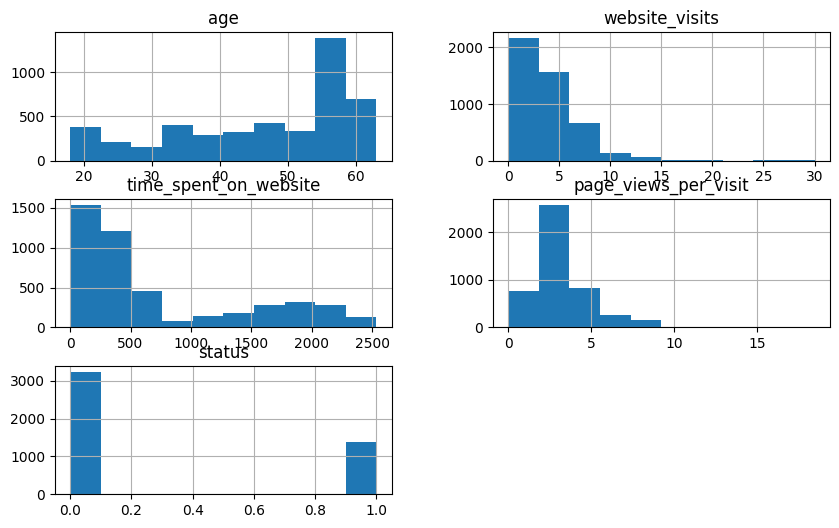

In [31]:
# Creating histograms
df.hist(figsize=(10,6))
plt.show()

**Observations**
- Converted customers are in ranges from 1000 - 1500.
-
-

### **Bivariate and Multivariate analysis**
We have analyzed different categorical and numerical variables. Let's now check how does attrition rate is related with other categorical variables.

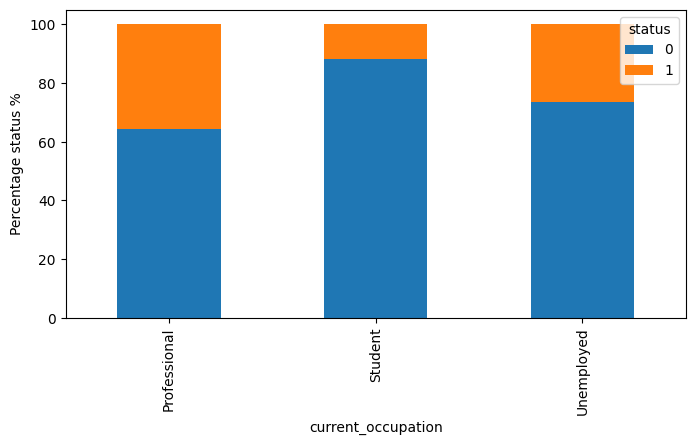

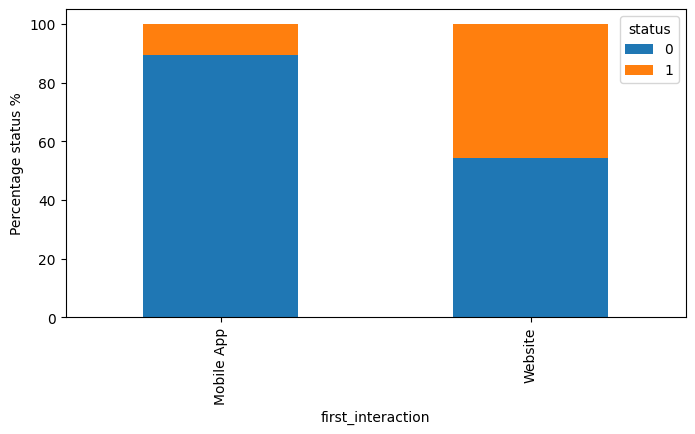

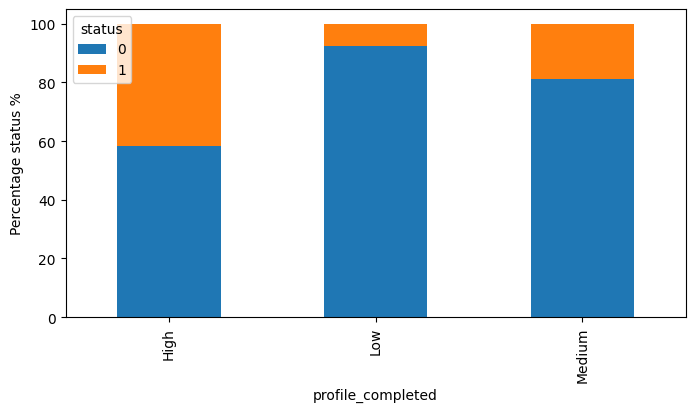

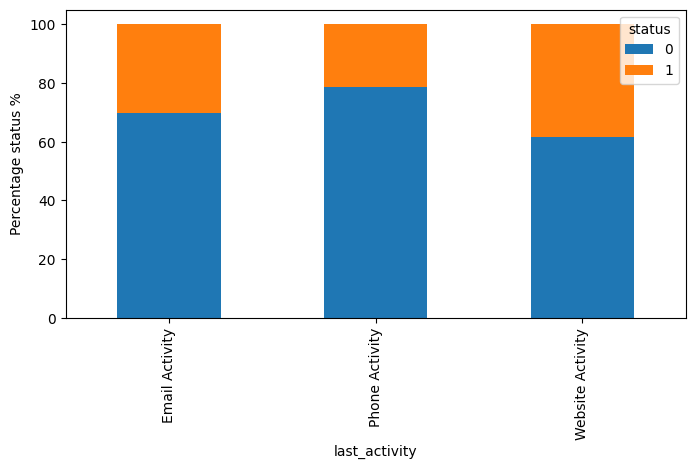

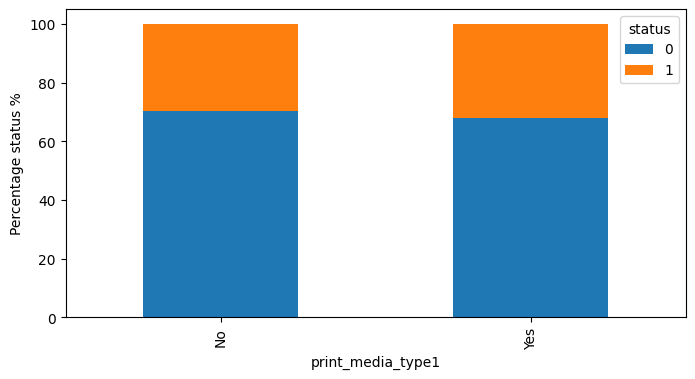

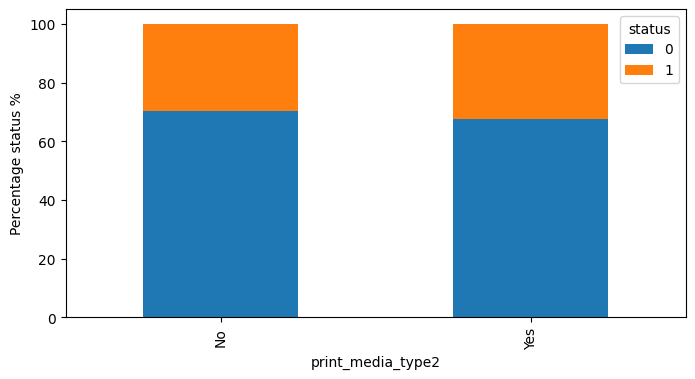

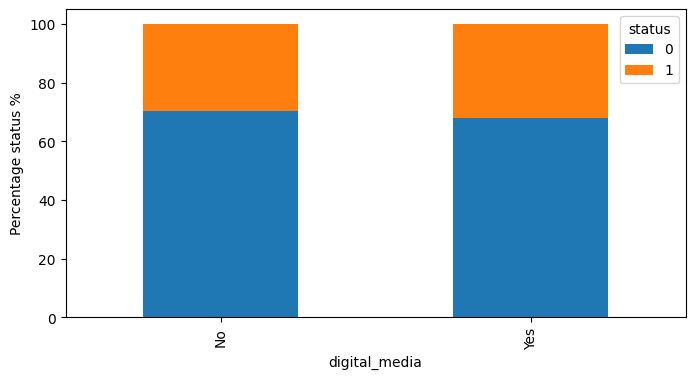

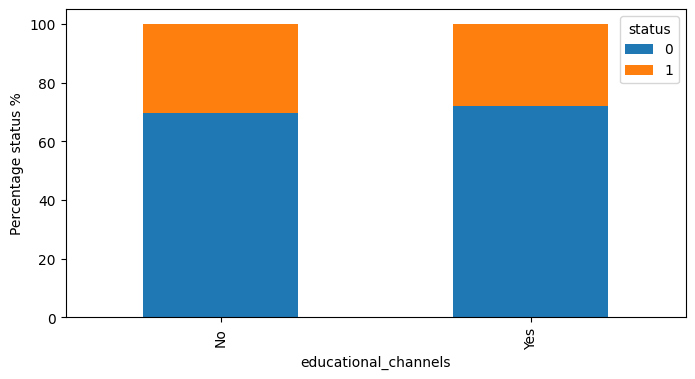

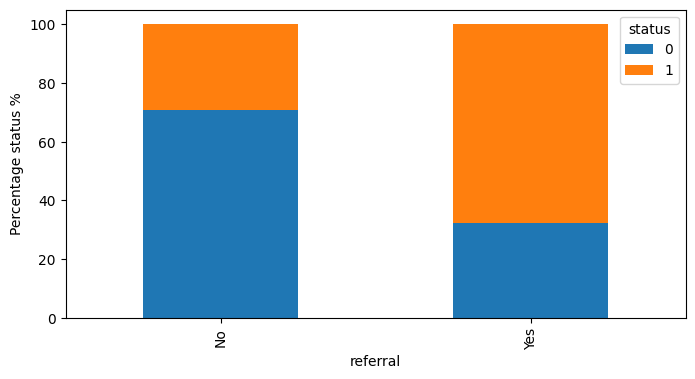

In [32]:
for i in cat_col:
    if i!='status':
        (pd.crosstab(df[i],df['status'],normalize='index')*100).plot(kind='bar',figsize=(8,4),stacked=True)
        plt.ylabel('Percentage status %')

**Observations**

- People who got converted are more on website as compared to mobile app.
-
-

In [33]:
# Mean of numerical variables grouped by attrition
df.groupby(['status']).mean()

,age,website_visits,time_spent_on_website,page_views_per_visit
status,,,,
0,45.153014,3.578980,577.420711,3.025732
1,48.663762,3.538126,1068.397967,3.027050


**Observations**
- Converted leads are spending more time  on website for enquiring and exploring.
-

In [34]:
df.head()

,age,current_occupation,first_interaction,profile_completed,website_visits,time_spent_on_website,page_views_per_visit,last_activity,print_media_type1,print_media_type2,digital_media,educational_channels,referral,status
0,57,Unemployed,Website,High,7,1639,1.861,Website Activity,Yes,No,Yes,No,No,1
1,56,Professional,Mobile App,Medium,2,83,0.320,Website Activity,No,No,No,Yes,No,0
2,52,Professional,Website,Medium,3,330,0.074,Website Activity,No,No,Yes,No,No,0
3,53,Unemployed,Website,High,4,464,2.057,Website Activity,No,No,No,No,No,1
4,23,Student,Website,High,4,600,16.914,Email Activity,No,No,No,No,No,0


<Axes: >

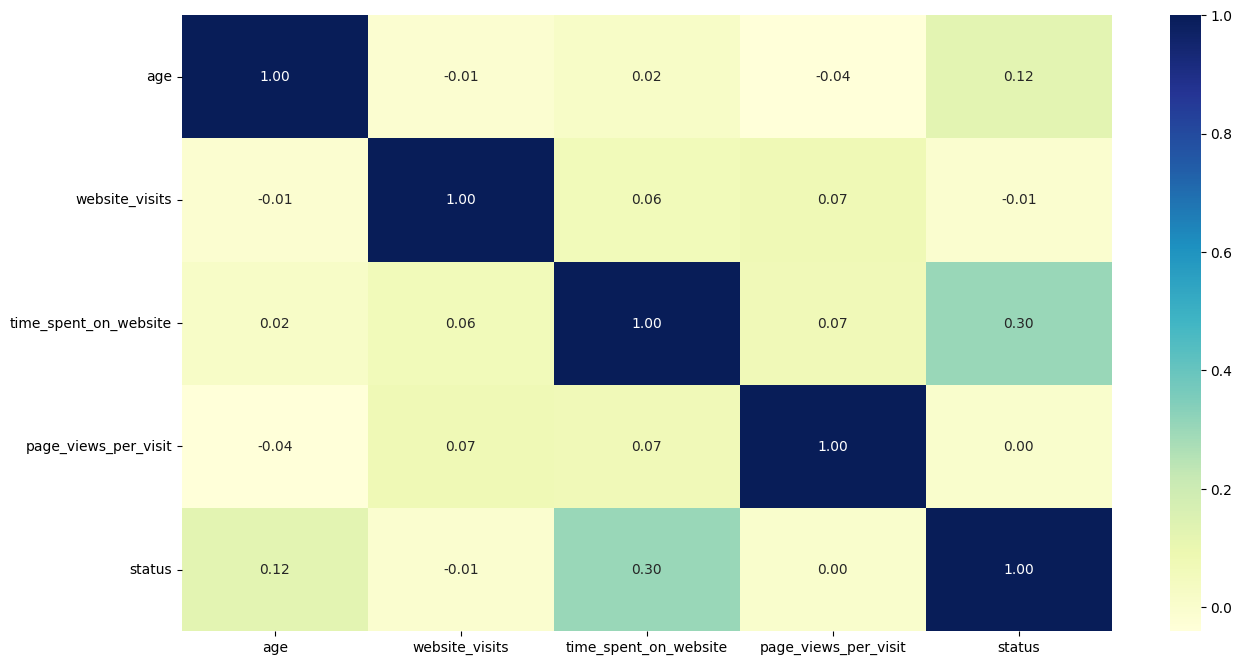

In [35]:
# Plotting the correlation between numerical variables
plt.figure(figsize=(15,8))
sns.heatmap(df.corr(),annot=True, fmt='0.2f', cmap='YlGnBu')

**Observations:**

- The heatmap shows that there is no correlation between variables. except time spent on website and status are positively correlated.

- The continuous variables show no correlation with the target variable (staus), which indicates that the categorical variables might be more important for the prediction.

In [36]:
#final_df = df.reindex(['referral'], axis=1)

# Creating list of dummy columns
#to_get_dummies_for = ['referral']
# Creating dummy variables
#df = pd.get_dummies(data = df, columns = to_get_dummies_for, drop_first = True)


In [37]:
# Separating the target variable and other variables
X = df.drop(columns = 'status')

Y = df['status']

In [38]:
X.shape

(4612, 13)

**Also, let's create a function to calculate and print the classification report and confusion matrix so that we don't have to rewrite the same code repeatedly for each model.**

In [39]:
# Creating metric function
def metrics_score(actual, predicted):
    print(classification_report(actual, predicted))

    cm = confusion_matrix(actual, predicted)
    plt.figure(figsize=(8,5))

    sns.heatmap(cm, annot=True,  fmt='.2f', xticklabels=['Not Attrite', 'Attrite'], yticklabels=['Not Attrite', 'Attrite'])
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

In [40]:
# Creating dummy variables, drop_first=True is used to avoid redundant variables
X = pd.get_dummies(X, drop_first = True)

In [103]:
# Y.value_counts(normalize=True)

In [41]:
# Splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.30, random_state = 1)

**Splitting the data into 70% train and 30% test set**


In [42]:
print("Shape of the training set: ", X_train.shape)

print("Shape of the test set: ", X_test.shape)

print("Percentage of classes in the training set:")

print(y_train.value_counts(normalize = True))

print("Percentage of classes in the test set:")

print(y_test.value_counts(normalize = True))

Shape of the training set:  (3228, 16)
Shape of the test set:  (1384, 16)
Percentage of classes in the training set:
0    0.704151
1    0.295849
Name: status, dtype: float64
Percentage of classes in the test set:
0    0.695087
1    0.304913
Name: status, dtype: float64


## Building a Decision Tree model

In [43]:
# Building decision tree model
dt = DecisionTreeClassifier(random_state = 1,)

In [44]:
# Fitting decision tree model
dt.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2273
           1       1.00      1.00      1.00       955

    accuracy                           1.00      3228
   macro avg       1.00      1.00      1.00      3228
weighted avg       1.00      1.00      1.00      3228



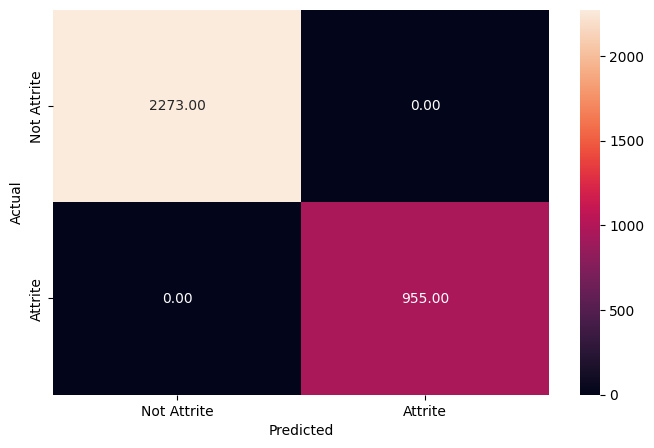

In [45]:
# Checking performance on the training dataset
y_train_pred_dt = dt.predict(X_train)

metrics_score(y_train, y_train_pred_dt)

**Observation:**

The Decision tree is giving a 100% score for all metrics on the training dataset.

              precision    recall  f1-score   support

           0       0.87      0.86      0.86       962
           1       0.69      0.70      0.70       422

    accuracy                           0.81      1384
   macro avg       0.78      0.78      0.78      1384
weighted avg       0.81      0.81      0.81      1384



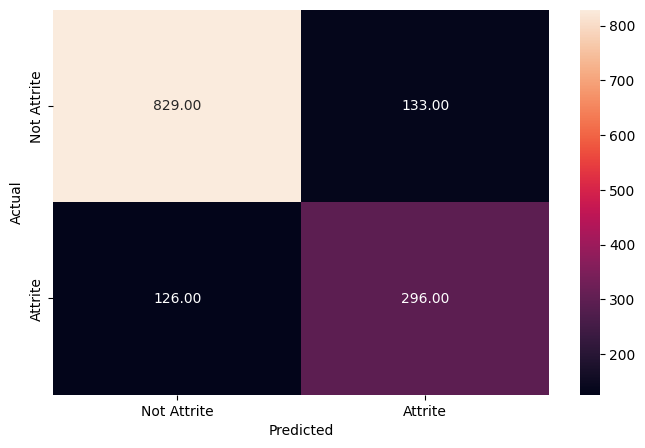

In [46]:
# Checking performance on the test dataset
y_test_pred_dt = dt.predict(X_test)

metrics_score(y_test, y_test_pred_dt)

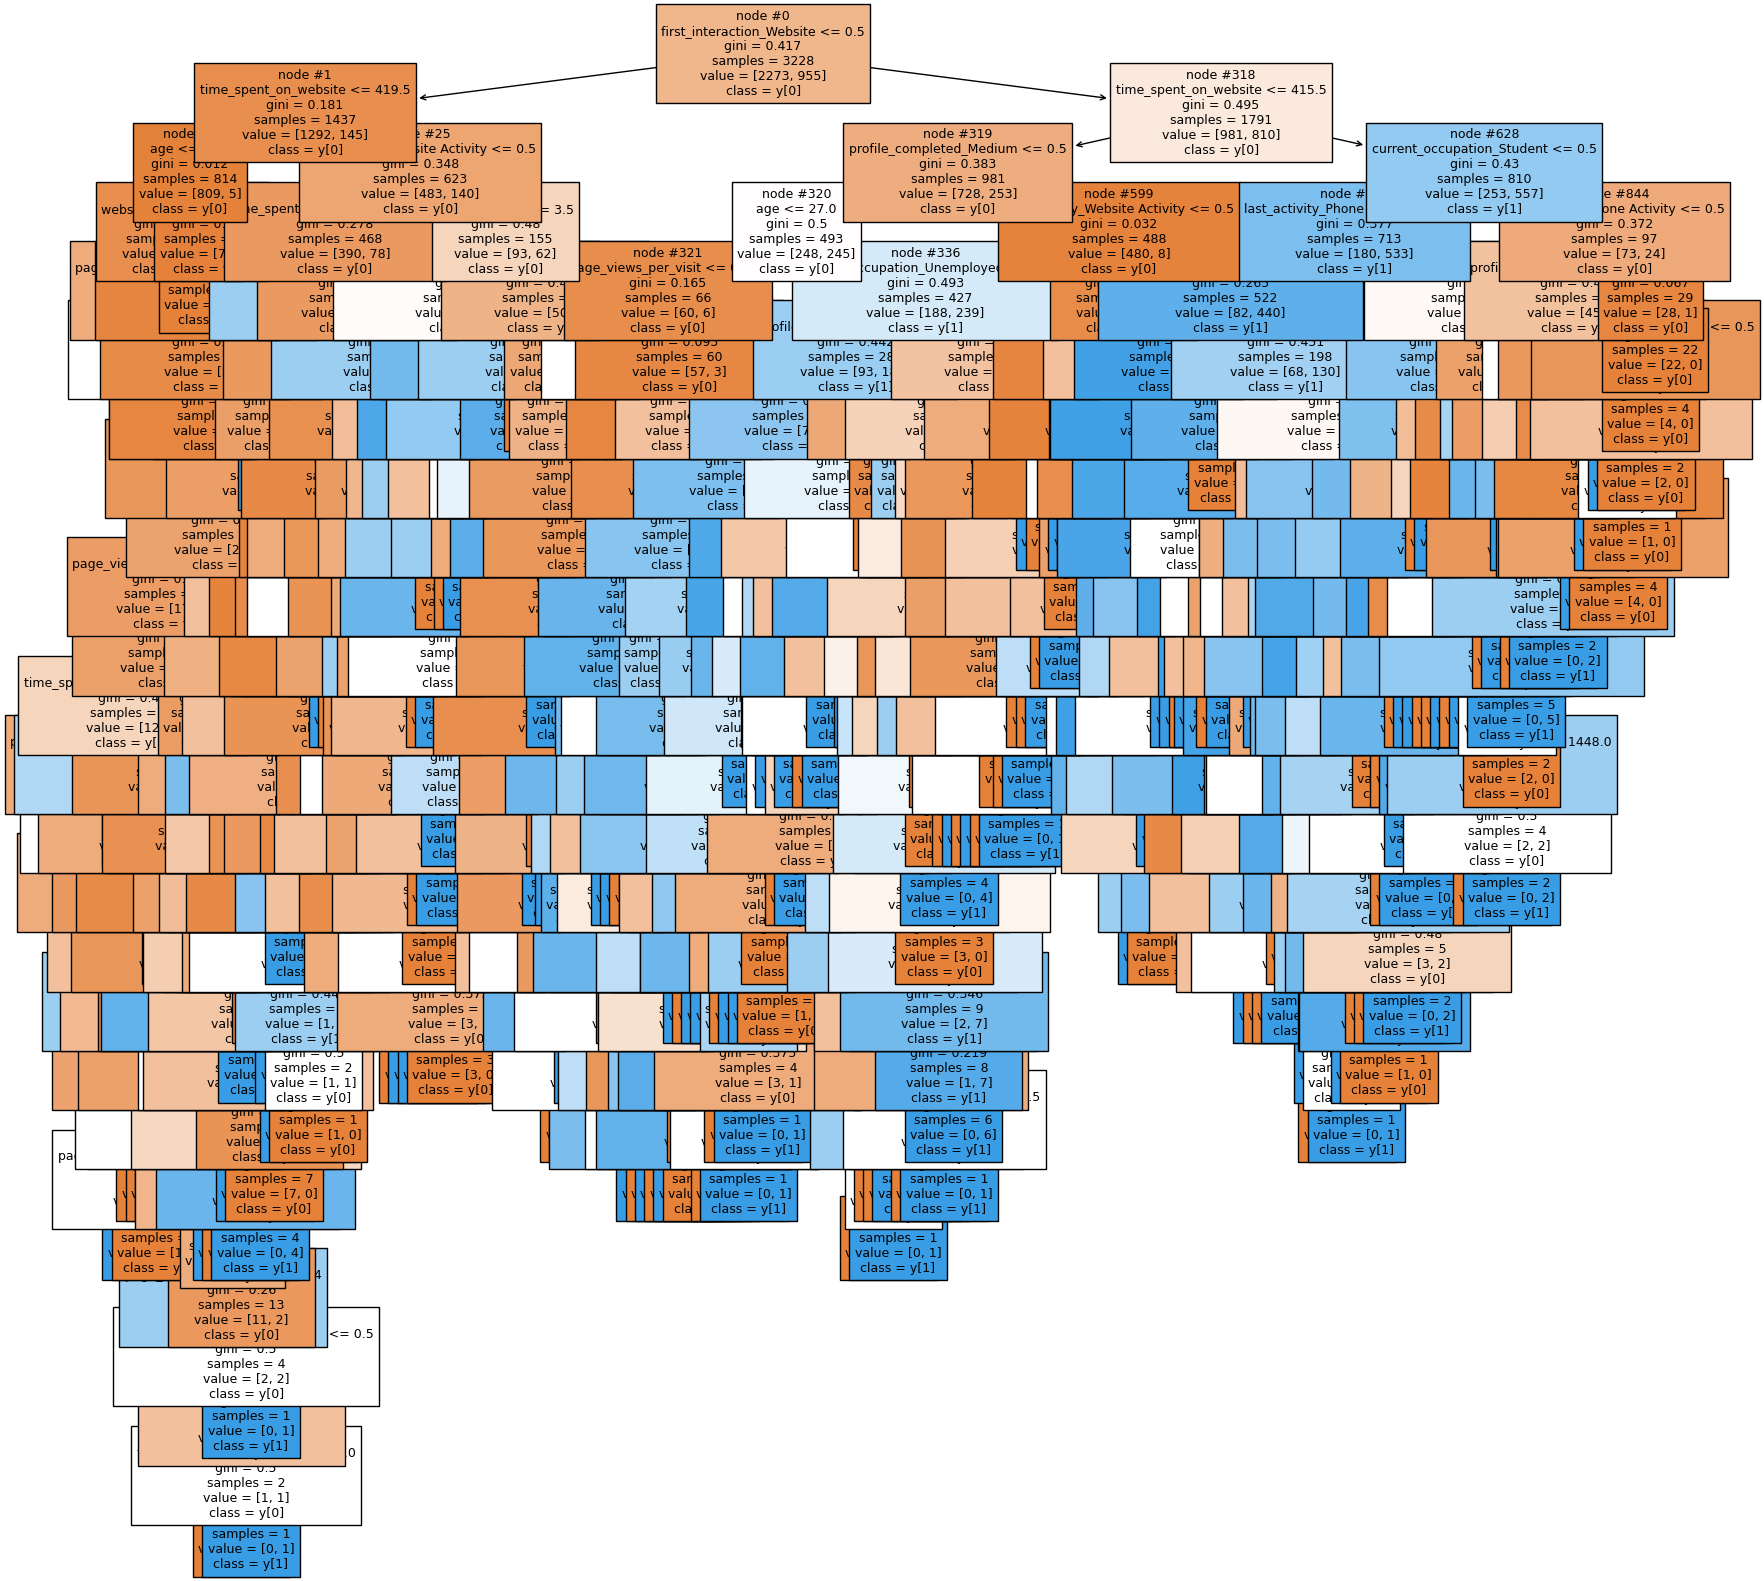

In [110]:
features = list(X.columns)

plt.figure(figsize = (20, 20))

tree.plot_tree(dt, feature_names = features, filled = True, fontsize = 9, node_ids = True, class_names = True)

plt.show()

In [47]:
# Importance of features in the tree building

print (pd.DataFrame(dt.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))

                                     Imp
time_spent_on_website           0.277845
first_interaction_Website       0.146368
page_views_per_visit            0.127103
profile_completed_Medium        0.124517
age                             0.087116
website_visits                  0.050957
current_occupation_Unemployed   0.040778
last_activity_Phone Activity    0.036790
current_occupation_Student      0.033281
last_activity_Website Activity  0.022535
profile_completed_Low           0.019435
digital_media_Yes               0.009037
educational_channels_Yes        0.008055
print_media_type1_Yes           0.007751
referral_Yes                    0.005151
print_media_type2_Yes           0.003282


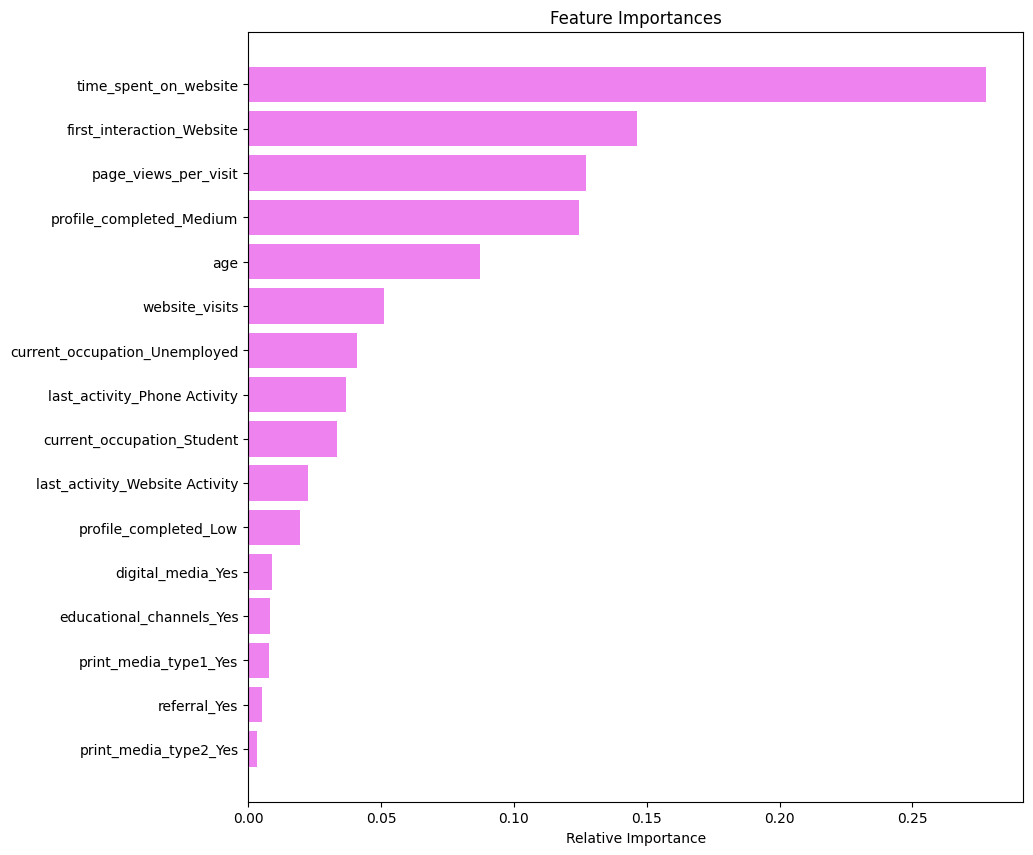

In [86]:
# Plotting the feature importance
importances = dt.feature_importances_

indices = np.argsort(importances)

plt.figure(figsize = (10, 10))

plt.title('Feature Importances')

plt.barh(range(len(indices)), importances[indices], color = 'violet', align = 'center')

plt.yticks(range(len(indices)), [features[i] for i in indices])

plt.xlabel('Relative Importance')

plt.show()

<Axes: xlabel='Importance'>

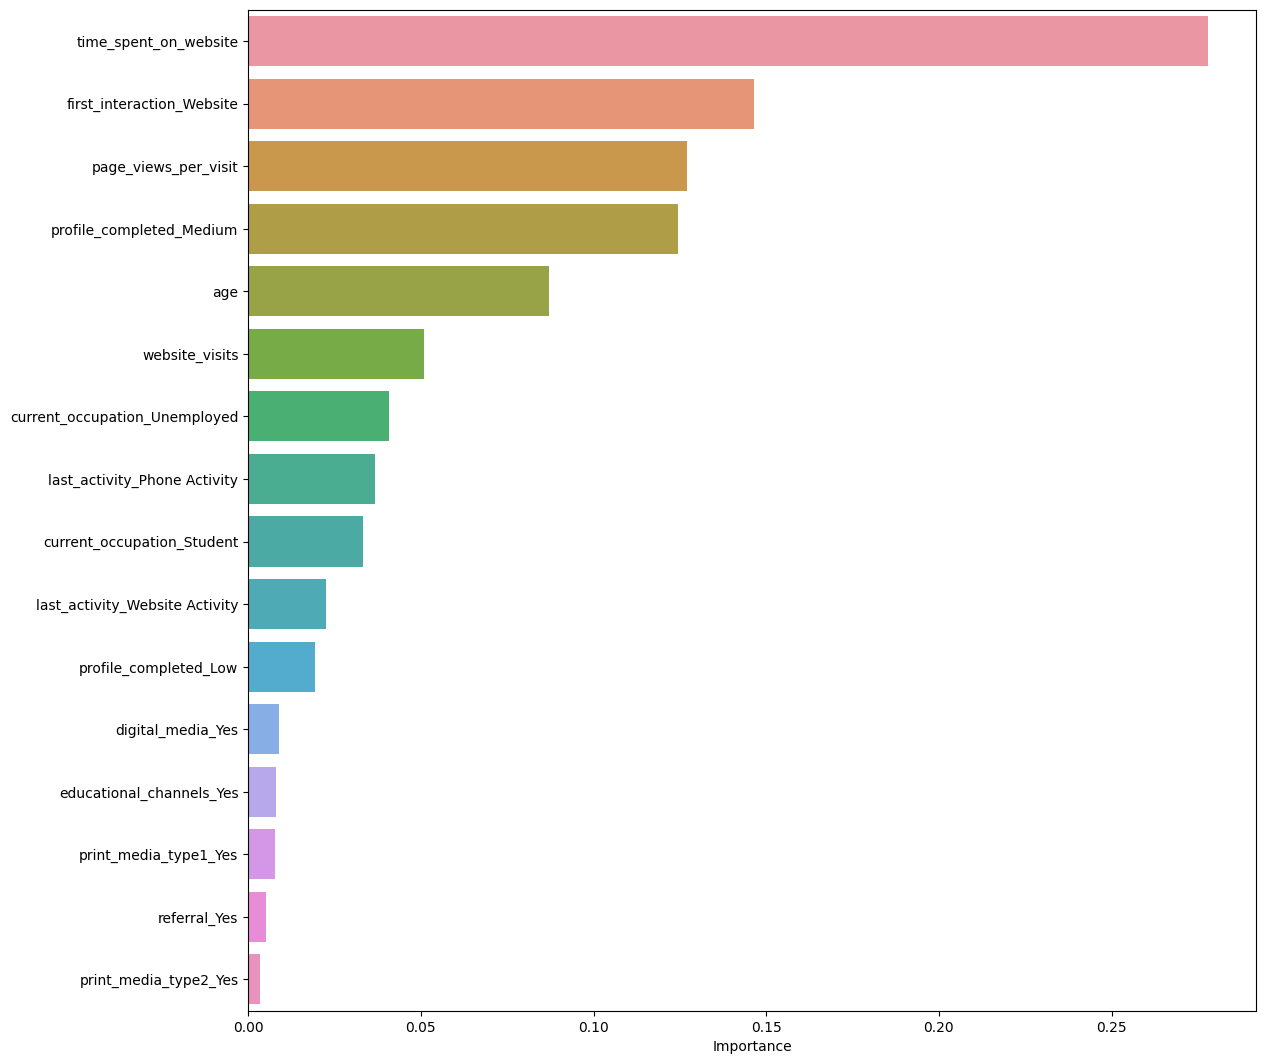

In [87]:
# Plot the feature importance

importances = dt.feature_importances_
columns = X.columns
importance_df = pd.DataFrame(importances, index = columns, columns = ['Importance']).sort_values(by = 'Importance', ascending = False)
plt.figure(figsize = (13, 13))
sns.barplot(data = importance_df, x = importance_df.Importance, y = importance_df.index)

##features = list(X.columns)

##plt.figure(figsize = (30, 20))

##tree.plot_tree(dt, max_depth = 4, feature_names = features, filled = True, fontsize = 12, node_ids = True, class_names = True)

##plt.show()

**Observations:**

- According to the Decision Tree, **time_spent_on_website is the most important feature, followed by first_interaction, page_views_per_visi and profile_completed.**
- This states that people who are spending more time website and using digital media platform tend to be a better potential leads.
- The other important features are `last_activity`, `current_occupation`, `age`, and `website visit`.

## Building a Random Forest model

In [48]:
# Fitting the Random Forest classifier on the training data
rf_estimator = RandomForestClassifier(class_weight = {0: 0.17, 1: 0.83}, random_state = 1,)

rf_estimator.fit(X_train, y_train)

RandomForestClassifier(class_weight={0: 0.17, 1: 0.83}, random_state=1)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2273
           1       1.00      1.00      1.00       955

    accuracy                           1.00      3228
   macro avg       1.00      1.00      1.00      3228
weighted avg       1.00      1.00      1.00      3228



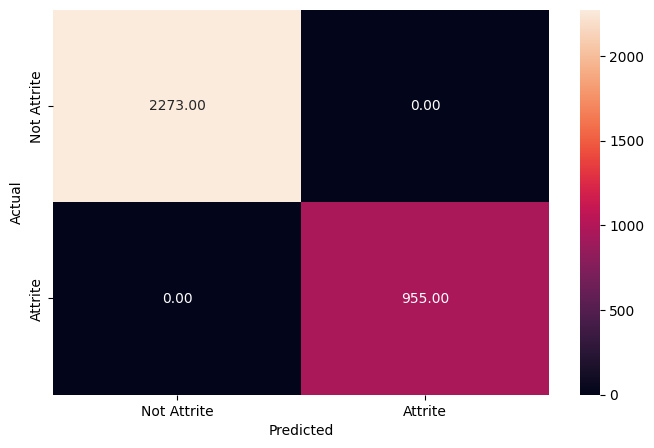

In [49]:
# Checking performance on the training data
y_pred_train_rf = rf_estimator.predict(X_train)

metrics_score(y_train, y_pred_train_rf)

**Observations:**
  
- Almost 0 errors on the training set, each sample has been classified correctly.
- Model has performed very well on the training set.  

              precision    recall  f1-score   support

           0       0.87      0.92      0.89       962
           1       0.80      0.68      0.73       422

    accuracy                           0.85      1384
   macro avg       0.83      0.80      0.81      1384
weighted avg       0.85      0.85      0.85      1384



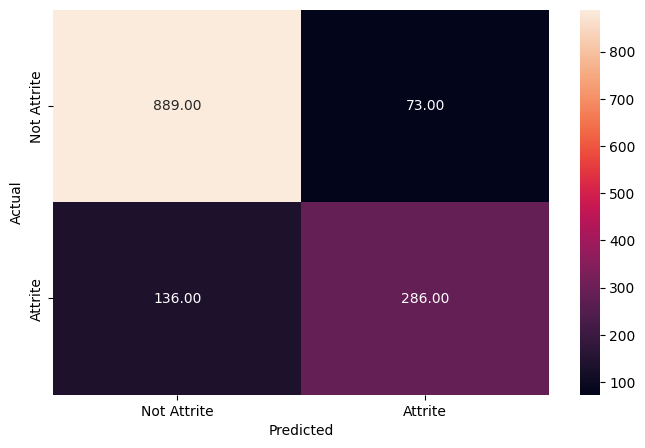

In [50]:
# Checking performance on the testing data
y_pred_test_rf = rf_estimator.predict(X_test)

metrics_score(y_test, y_pred_test_rf)

**Observations:**
* The Random Forest classifier **seems to be overfitting**.
- The recall score is 0.68  for test data set which is not satisfactory.
- We can reduce overfitting and improve recall by hyperparameter tuning.

**Let's check the feature importance of the Random Forest**


<Axes: title={'center': 'Feature Importances'}, xlabel='Importance'>

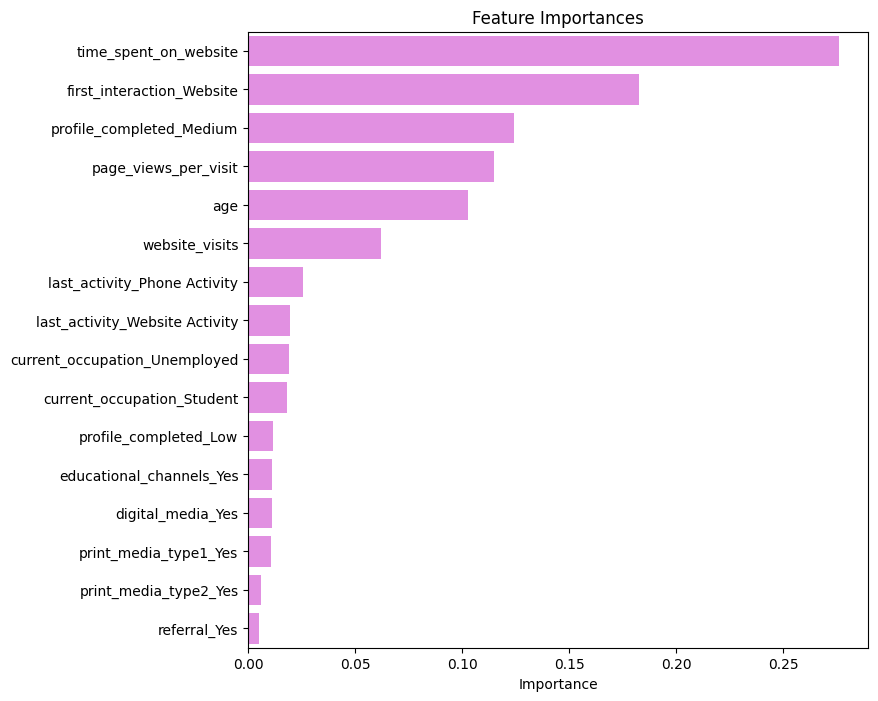

In [51]:
importances = rf_estimator.feature_importances_

columns = X_train.columns

importance_df = pd.DataFrame(importances, index = columns, columns = ['Importance']).sort_values(by = 'Importance', ascending = False)


plt.figure(figsize=(8, 8))
plt.title("Feature Importances")
sns.barplot(x = importance_df.Importance, y = importance_df.index, color="violet")

**Observation**

- Time spent on website and first interaction on website are among top 2 categories which are important as per RF model.

### **Tuning Models**

We will tune Decision Trees and Random Forest models. For tuning, we will only use Grid Search.

In [59]:
# Building decision tree model
dt = DecisionTreeClassifier(random_state = 1,max_depth=15)

In [60]:
# Fitting decision tree model
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=15, random_state=1)

              precision    recall  f1-score   support

           0       0.98      0.98      0.98      2273
           1       0.96      0.96      0.96       955

    accuracy                           0.98      3228
   macro avg       0.97      0.97      0.97      3228
weighted avg       0.98      0.98      0.98      3228



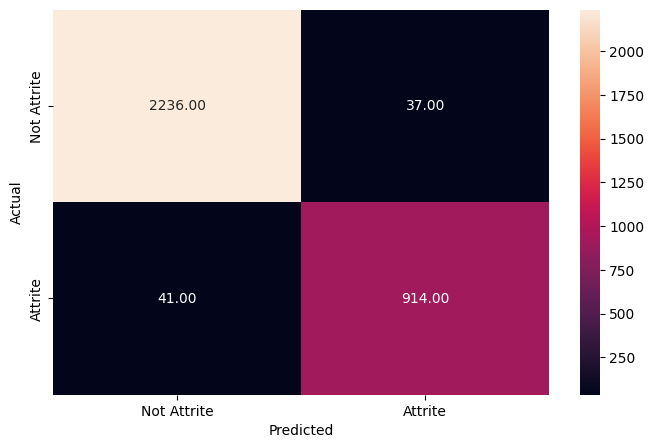

In [61]:
# Checking performance on the training dataset
y_train_pred_dt = dt.predict(X_train)

metrics_score(y_train, y_train_pred_dt)

              precision    recall  f1-score   support

           0       0.87      0.87      0.87       962
           1       0.71      0.70      0.70       422

    accuracy                           0.82      1384
   macro avg       0.79      0.79      0.79      1384
weighted avg       0.82      0.82      0.82      1384



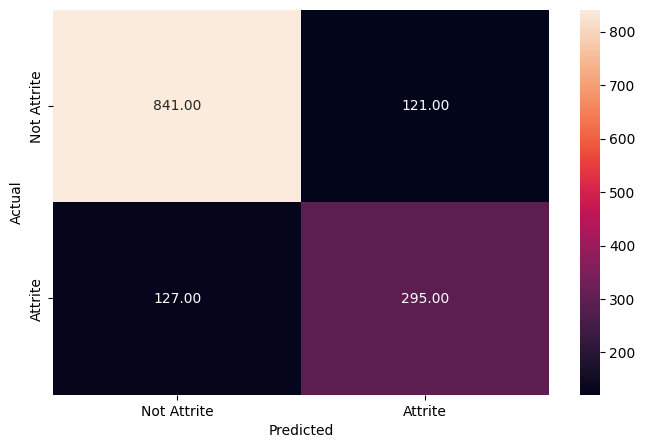

In [62]:
# Checking performance on the test dataset
y_test_pred_dt = dt.predict(X_test)

metrics_score(y_test, y_test_pred_dt)

**Observation**

- Performance on train data is 96% for both recall and precision.
- It can lead to overfitting results


**For RF**

In [56]:
# Fitting the Random Forest classifier on the training data
rf_estimator = RandomForestClassifier(class_weight = {0: 0.17, 1: 0.83}, random_state = 1,max_depth=5)

rf_estimator.fit(X_train, y_train)

RandomForestClassifier(class_weight={0: 0.17, 1: 0.83}, max_depth=5,
                       random_state=1)

              precision    recall  f1-score   support

           0       0.99      0.67      0.80      2273
           1       0.56      0.98      0.71       955

    accuracy                           0.76      3228
   macro avg       0.77      0.83      0.76      3228
weighted avg       0.86      0.76      0.77      3228



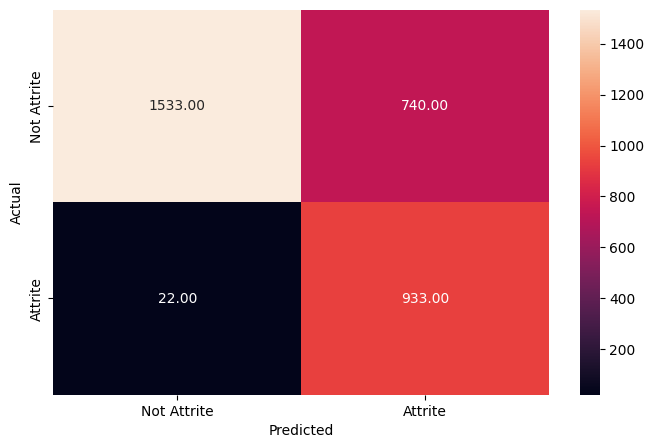

In [57]:
# Checking performance on the training data
y_pred_train_rf = rf_estimator.predict(X_train)

metrics_score(y_train, y_pred_train_rf)

              precision    recall  f1-score   support

           0       0.97      0.66      0.79       962
           1       0.55      0.95      0.70       422

    accuracy                           0.75      1384
   macro avg       0.76      0.81      0.74      1384
weighted avg       0.84      0.75      0.76      1384



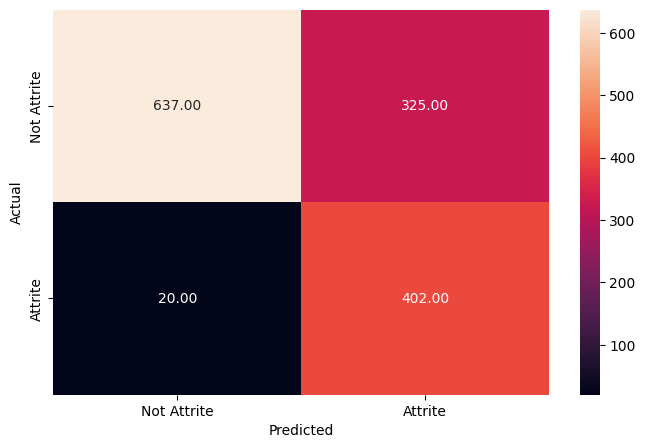

In [58]:
# Checking performance on the testing data
y_pred_test_rf = rf_estimator.predict(X_test)

metrics_score(y_test, y_pred_test_rf)

**Observation:**


1.  We can see that recall is good for both train and test data however, precision is not upto the mark.
2.  In order to get better perfiormace precision should be upto 80%



**Observations**
- After tuning both the modela we can see that recall has increased however precision has gone down which can  possibly result in giving irregular results we can check perfomraces for other models as well.

## Actionable Insights and Recommendations

- We can focus more on website and other digital channel to increase presensce in market for our courses and product as most trending data is shocasing potential leads form that area.
- We can target peolpe with email activity as most customer base like to interact with them out of others channel.
- We can target proffessional audience as they are more keen intowrds buy e learing product for there skill developments.
- We can intrpoduce new refferal schemes to boost the growth of leads as data does not better results in that field of area.
- We can improve our website and upskill our website with relevent information for better display about products whioch potential leads can easily access and get in touch with us for enrolling.